In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("C:/Users/ASUS/Documents/SFU/Competition/RMDS/full_data_2.csv")

# Random Forest Regression
The variables that we want to use are cityid, homeType, zipcode, hasGarage, hasPetsAllowed, hasPrivatePool, heating, hasCooling, lotSize, livingArea

Our first step is to do one hot encoding for the categorical variables.

In [27]:
subset_data = data[['cityid', 'homeType', 'zipcode',
            'hasGarage', 'hasPetsAllowed', 'lotSize', 'livingArea','hasPrivatePool',
            'heating', 'hasCooling', 'price']]
subset_data['lotSize'] = subset_data['lotSize'].str.extract(r'(\d+\,\d+)')[0].str.replace(',', '').astype(float)
subset_data['livingArea'] = subset_data['livingArea'].str.extract(r'(\d+\,\d+)')[0].str.replace(',', '').astype(float)
print(subset_data.dtypes)

subset_data = subset_data.astype({"hasPrivatePool" : float, "heating" : bool, "hasCooling" : bool})
print(subset_data.dtypes)
subset_data = subset_data.dropna()

#One-hot encoding
subset_data = pd.get_dummies(subset_data)                                                  
subset_data.head(10)

cityid              int64
homeType           object
zipcode             int64
hasGarage            bool
hasPetsAllowed       bool
lotSize           float64
livingArea        float64
hasPrivatePool     object
heating            object
hasCooling         object
price               int64
dtype: object
cityid              int64
homeType           object
zipcode             int64
hasGarage            bool
hasPetsAllowed       bool
lotSize           float64
livingArea        float64
hasPrivatePool    float64
heating              bool
hasCooling           bool
price               int64
dtype: object


<ipython-input-27-211d8c5a8ddd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['lotSize'] = subset_data['lotSize'].str.extract(r'(\d+\,\d+)')[0].str.replace(',', '').astype(float)
<ipython-input-27-211d8c5a8ddd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['livingArea'] = subset_data['livingArea'].str.extract(r'(\d+\,\d+)')[0].str.replace(',', '').astype(float)


,cityid,zipcode,hasGarage,hasPetsAllowed,lotSize,livingArea,hasPrivatePool,heating,hasCooling,price,homeType_APARTMENT,homeType_CONDO,homeType_HOME_TYPE_UNKNOWN,homeType_LOT,homeType_MANUFACTURED,homeType_MULTI_FAMILY,homeType_SINGLE_FAMILY,homeType_TOWNHOUSE
5,20330,94111,True,True,113438.0,1062.0,0.0,True,True,950000,0,1,0,0,0,0,0,0
14,20330,94109,False,False,1380.0,2100.0,0.0,True,True,1777888,0,0,0,0,0,0,1,0
15,20330,94109,False,False,1380.0,2100.0,0.0,True,True,1777888,0,0,0,0,0,0,1,0
65,20330,94115,True,True,14450.0,1850.0,0.0,True,True,1649000,0,1,0,0,0,0,0,0
142,20330,94121,False,False,3000.0,2000.0,0.0,True,True,1473000,0,1,0,0,0,0,0,0
148,20330,94121,False,False,3049.0,3575.0,0.0,True,False,3085000,0,0,0,0,0,0,1,0
161,20330,94121,False,False,3049.0,4089.0,0.0,True,False,700000,0,0,0,0,0,0,1,0
302,20330,94116,False,False,3000.0,2272.0,0.0,True,False,1600000,0,0,0,0,0,0,1,0
337,20330,94112,True,False,5079.0,1950.0,0.0,True,True,1550000,0,0,0,0,0,0,1,0
338,20330,94112,True,False,5079.0,1950.0,0.0,True,True,1550000,0,0,0,0,0,0,1,0


In [28]:

labels = np.array(subset_data['price'])
subset_data = subset_data.drop('price', axis = 1)
subset_list = list(subset_data.columns)
subset_data = np.array(subset_data)

from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(subset_data, labels, test_size = 0.25, 
                random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (3959, 17)
Training Labels Shape: (3959,)
Testing Features Shape: (1320, 17)
Testing Labels Shape: (1320,)


In [30]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_features, train_labels)

#make predictions
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)
print(predictions)
print('Mean Absolute error:', round(np.mean(errors), 2), 'degrees.')


<bound method BaseForest.fit of RandomForestRegressor(n_estimators=1000, random_state=42)>
[1586745.471       703713.564       568803.36866667 ... 1778311.286
 1275147.042      1186397.138     ]
Mean Absolute error: 501061.46 degrees.


In [14]:
#MAPE
mape = 100 * (errors/test_labels)
print(mape)
accuracy = 100 - np.mean(mape)
print('Accuracy:' , round(accuracy,2), '%.')

[ 2.37067555 16.70208358 22.06080873 ... 36.80369921 13.84141608
 24.88390926]
Accuracy: 73.06 %.


Feature: 0, Score: 0.00534
Feature: 1, Score: 0.05612
Feature: 2, Score: 0.01097
Feature: 3, Score: 0.00005
Feature: 4, Score: 0.10092
Feature: 5, Score: 0.80968
Feature: 6, Score: 0.01035
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00018
Feature: 9, Score: 0.00017
Feature: 10, Score: 0.00101
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00005
Feature: 14, Score: 0.00285
Feature: 15, Score: 0.00226
Feature: 16, Score: 0.00005


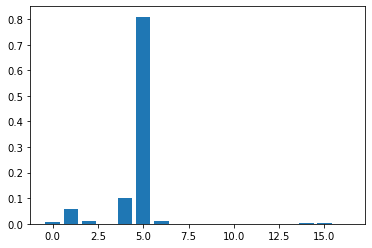

In [15]:
#Determining important features

importance = rf.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

from matplotlib import pyplot
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

#feature 5: hasPetsAllowed
#feature 4: hasGarage
#feature 2: homeType

In [45]:
real_price = pd.DataFrame(test_labels)
print(real_price)

predictions = pd.DataFrame(predictions)


result = pd.concat([real_price, predictions], axis=1)
print(result)


            0
0     1550000
1      603000
2      466000
3     1050000
4      861000
...       ...
1315   345000
1316   599000
1317  1299900
1318  1480000
1319   950000

[1320 rows x 1 columns]
            0             0
0     1550000  1.586745e+06
1      603000  7.037136e+05
2      466000  5.688034e+05
3     1050000  1.077292e+06
4      861000  7.921148e+05
...       ...           ...
1315   345000  3.400242e+05
1316   599000  6.537965e+05
1317  1299900  1.778311e+06
1318  1480000  1.275147e+06
1319   950000  1.186397e+06

[1320 rows x 2 columns]


In [46]:
result.to_csv("Prediction using Random Forest Regression",index = False)

In [47]:
result

,0,0
0,1550000,1.586745e+06
1,603000,7.037136e+05
2,466000,5.688034e+05
3,1050000,1.077292e+06
4,861000,7.921148e+05
...,...,...
1315,345000,3.400242e+05
1316,599000,6.537965e+05
1317,1299900,1.778311e+06
1318,1480000,1.275147e+06
